#### Get Attention from Model
Inspect the attention matrices of the transformer model.

In [ ]:
cd ..

In [ ]:
import pandas as pd
import numpy as np
import torch
from matplotlib import pyplot as plt
import seaborn as sns
from cvc import model_utils
from lab_notebooks.utils import TRANSFORMER, DEVICE, DATA_DIR

In [5]:
data_path = DATA_DIR + "db_data_appearances.csv"
sampled_data = pd.read_csv(data_path, engine="pyarrow")

In [12]:
# randomly sample 50 sequences from the dataset
sampled_data_small = sampled_data.sample(n=1000, random_state=42)
attentions = model_utils.get_transformer_attentions(
    TRANSFORMER, list(sampled_data_small['Sequences']),
    device=torch.device('cpu'),
    batch_size=1024,
    layer=-1
)

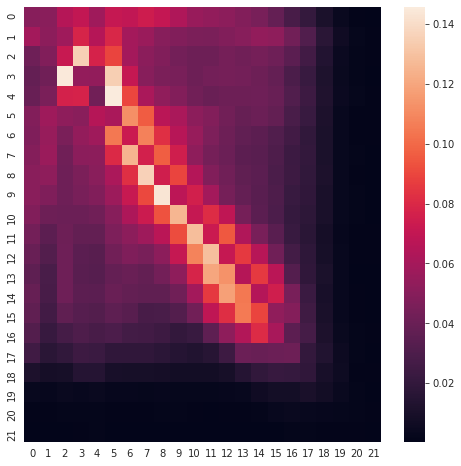

In [11]:
inputs_lengths = sampled_data['Sequences'].iloc[:3].str.len().tolist()

all_attns = []
for i in range(len(attentions)):
    attns = attentions[i]
    attns = np.mean(attns, axis=0)
    all_attns.append(attns)

# pad the attention matrices
max_len = max([len(x) for x in all_attns])
for i in range(len(all_attns)):
    all_attns[i] = np.pad(all_attns[i], ((0, max_len - len(all_attns[i])), (0, max_len - len(all_attns[i]))), 'constant', constant_values=0)

# get mean
all_attns = np.mean(all_attns, axis=0)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(all_attns)
ax.grid(False)
plt.show()